# Imports

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

# Loading data

In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv', index_col =  'id')
print('First rows of train data:')
display(train_data.head())
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv', index_col = 'id')
print('First rows of test data:')
display(test_data.head())

First rows of train data:


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


First rows of test data:


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


# Exploratory Data Analysis

In [3]:
full_dataset = deepcopy(train_data)
features = full_dataset.drop(columns='Exited')

In [4]:
features.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [5]:
#Checking how many different countries there are
#features.Geography.unique()

<Axes: >

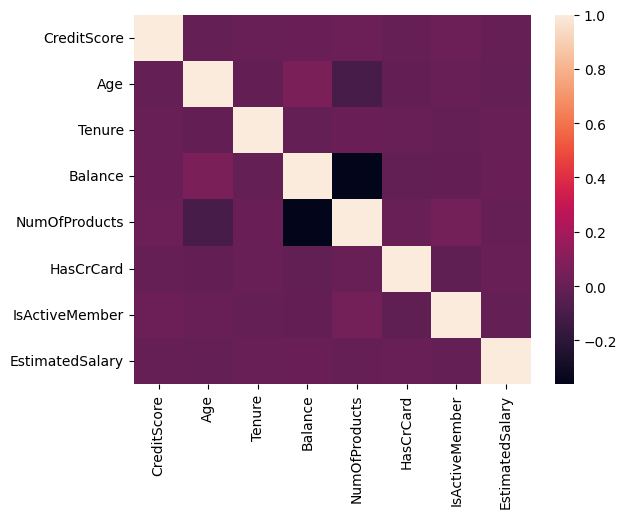

In [6]:
# Creating correlation matrix for the numerical features
corr = features[['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].corr()
sns.heatmap(corr)

# Initial model using XGBRegressor

In [7]:
#Setting the features
X = deepcopy(features)
X = X[['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,
0,668,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,33.0,5,0.00,2,1.0,1.0,15068.83


In [8]:
# Setting the target
y = deepcopy(train_data)
y = train_data.Exited
y.head()

id
0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

In [9]:
#Initializing stratified K-fold
stratified_kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

for train_index, test_index in stratified_kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
